**DBSCAN (Density-Based Spatial Clustering of Applications with Noise)**

DBSCAN es un algoritmo de clustering ampliamente utilizado en el análisis de datos espaciales debido a su capacidad para detectar clusters de diferentes formas y tamaños, así como para manejar datos con ruido.

Esta técnica funciona mejor con clústeres de formas arbitrarias, es decir, clústeres sin una forma geométrica simple como un círculo o un cuadrado, y con ruido, lo que significa que esos clústeres tienen puntos de datos que no les pertenecen. DBSCAN también ayuda en la detección de valores atípicos mediante la agrupación de puntos cercanos entre sí con el uso de dos parámetros llamados Eps y minPoints.

https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

https://www.datacamp.com/tutorial/dbscan-clustering-algorithm

https://medium.com/@tarammullin/dbscan-parameter-estimation-ff8330e3a3bd

https://iopscience.iop.org/article/10.1088/1755-1315/31/1/012012/pdf


- **eps**: especifica qué tan cerca deben estar los puntos entre sí para ser considerados parte de un clúster. Esto significa que si la distancia entre dos puntos es menor o igual a este valor (eps), esos puntos se consideran vecinos.

- **minPoints**: el número mínimo de puntos para formar una región densa. Por ejemplo, si establecemos el parámetro minPoints en 5, entonces necesitamos al menos 5 puntos para formar una región densa.


<img src="https://www.researchgate.net/publication/335588770/figure/fig5/AS:961479322906639@1606245942677/The-basic-principle-of-DBSCAN-algorithm-Ester-et-al-1996.png" width="500"/>

Todos los puntos que no están dentro de la distancia Eps de otro punto y no tienen el número correspondiente de minPoints dentro de su propia distancia Eps se llaman ruido o valores atípicos.


### Conceptos importantes:

1. **Epsilón (ε):** Parámetro que define la distancia máxima entre dos puntos para que sean considerados vecinos.
2. **MinPts:** Número mínimo de puntos dentro de un vecindario para formar un cluster.
3. **Puntos Núcleo:** Puntos con al menos MinPts vecinos dentro de un radio ε.
4. **Puntos Frontera:** Puntos en el borde de un cluster pero no son núcleo.
5. **Puntos Ruido:** Puntos que no son núcleo ni frontera.

### Proceso de Clustering:

1. **Definición de Parámetros:** Seleccionar valores adecuados de ε y MinPts según la distribución de los datos.
2. **Identificación de Puntos Núcleo:** Encontrar puntos con al menos MinPts vecinos dentro de un radio ε.
3. **Expansión de Clusters:** Expandir clusters conectando puntos núcleo y sus vecinos, formando así clusters densos.
4. **Asignación de Puntos Frontera y Ruido:** Asignar puntos frontera a clusters existentes o considerarlos ruido si no están lo suficientemente cerca de ningún cluster.

### Aplicaciones:

1. **Análisis de Datos Espaciales:** Agrupación de datos geoespaciales como ubicaciones de tiendas, puntos de interés, etc.
2. **Segmentación de Clientes:** Identificación de grupos de clientes con características similares para estrategias de marketing personalizadas.
3. **Detección de Anomalías:** Identificación de puntos de datos atípicos o anómalos en conjuntos de datos.
4. **Procesamiento de Imágenes:** Segmentación de imágenes en regiones con características similares.

### Ventajas:

1. **Robustez ante Ruido:** Capacidad para manejar datos con ruido y puntos atípicos.
2. **No Requiere Especificación del Número de Clusters:** No es necesario especificar el número de clusters a priori.
3. **Identificación de Clusters de Formas y Tamaños Arbitrarios:** Capacidad para identificar clusters con formas y tamaños complejos.

### Limitaciones:

1. **Sensible a la Elección de Parámetros:** Los resultados pueden variar significativamente según los valores de ε y MinPts seleccionados.
2. **Ineficiente para Datos de Alta Dimensión:** El rendimiento puede disminuir en conjuntos de datos con muchas dimensiones.
3. **Difícil Manejo de Densidades Variables:** Puede tener dificultades para identificar clusters en conjuntos de datos con densidades variables.



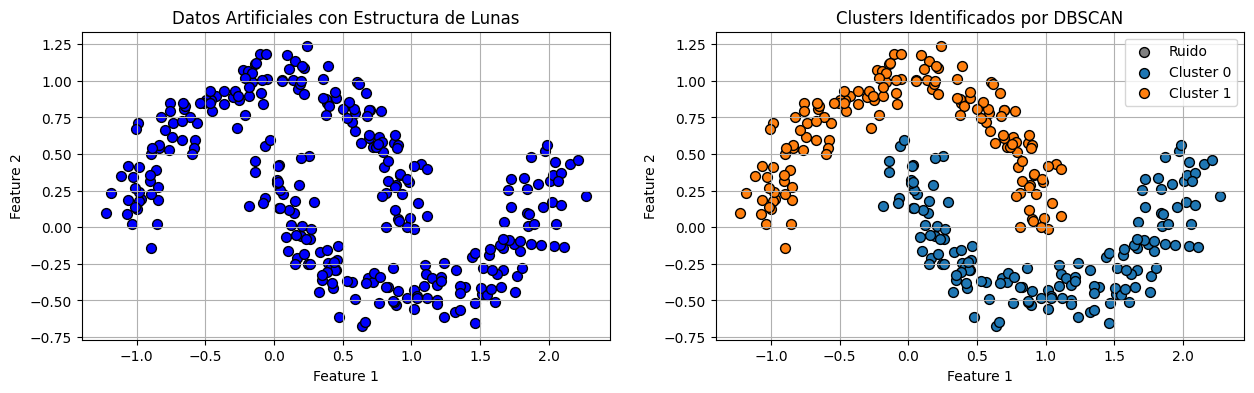

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN

# Generar datos artificiales con estructura de clusters en forma de lunas
X, _ = make_moons(n_samples=300, noise=0.1, random_state=42)

# Visualizar los datos generados
plt.figure(figsize=(15, 4))

plt.subplot(121)
plt.scatter(X[:, 0], X[:, 1], c='blue', marker='o', edgecolor='black', s=50)
plt.title('Datos Artificiales con Estructura de Lunas')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.2, min_samples=5)
y_dbscan = dbscan.fit_predict(X)

# Visualizar los clusters identificados por DBSCAN
plt.subplot(122)
plt.scatter(X[y_dbscan == -1, 0], X[y_dbscan == -1, 1], c='gray', marker='o', edgecolor='black', s=50, label='Ruido')
for i in np.unique(y_dbscan[y_dbscan != -1]):
    plt.scatter(X[y_dbscan == i, 0], X[y_dbscan == i, 1], marker='o', edgecolor='black', s=50, label=f'Cluster {i}')
    
plt.title('Clusters Identificados por DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


In [15]:
import pandas as pd


column_names = ['Feature1', 'Feature2']  # Nombres para las columnas de X
target_column = 'Target'  # Nombre para la columna del vector y
df = pd.DataFrame(X, columns=column_names)
# Añadir el vector y como una nueva columna al DataFrame
df[target_column] = y_dbscan
df.to_csv("data.csv")

La selección de Eps y minPoints deben ser realizados con una concentración específica ya que un solo cambio en los valores podría influir en todo el proceso de agrupación. Pero **, ¿cómo podemos saber los valores recomendados para nuestros problemas?**


Podemos usar algunas estimaciones de acuerdo al conjunto de datos de nuestro problema. Debemos elegir Eps dependiendo de la distancia del conjunto de datos y podemos usar un gráfico de distancia-k para guiarnos. Debemos estar conscientes de que siempre es preferible un número pequeño, ya que un valor grande combinaría más puntos de datos por clúster y cierta información podría perderse.


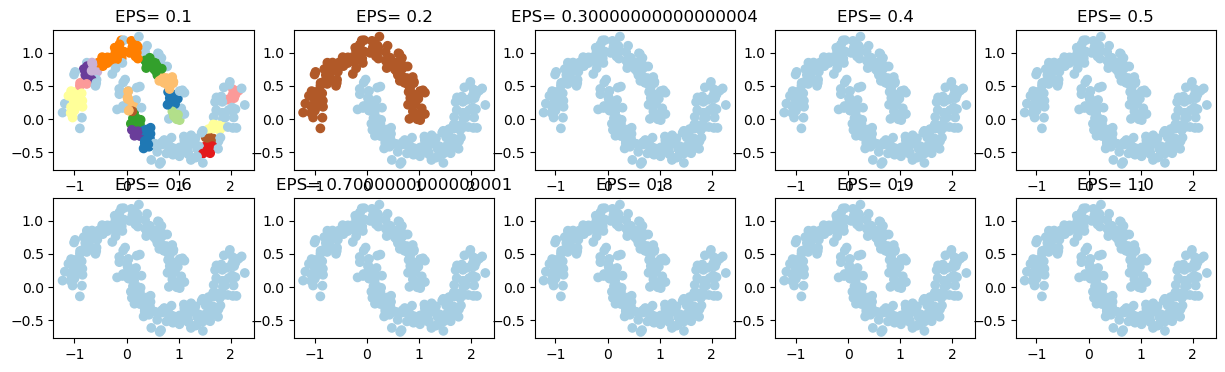

In [17]:

EPS = np.linspace(0.1,1,10)
plt.figure(figsize=(15, 4))

for i, eps in enumerate(EPS):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    y_dbscan = dbscan.fit_predict(X)
    plt.subplot(2,5,i+1)
    plt.scatter(X[:, 0], X[:, 1], c=y_dbscan, cmap=plt.cm.Paired)
    plt.title("EPS= "+str(eps))


Los mejores resultados se consiguen cuando los valores de **Eps** se encuentran entre 0.14 y 0.23. Cuando el valor de Eps es menor que este rango, hay una cantidad excesiva de ruido o valores atípicos. En cambio, cuando es mayor, las agrupaciones se vuelven muy incluyentes como el valor 1 de Eps, cuando es un solo grupo.

El valor de minPoints va de acuerdo con el número de puntos de datos que tengamos. Sin embargo, debemos considerar que el valor mínimo puede ser nuestra dimensión de nuestro conjuntos de datos, es decir, el número de características con las que trabajamos con uno adicional, mientras que no tengamos un número de valor máximo. Por lo tanto, mientras mayor sea el conjunto de datos, mayores son los valores de minPoints que debemos seleccionar.

No existe una forma automática de determinar el valor MinPts para DBSCAN. En última instancia, el valor MinPts debe establecerse utilizando el conocimiento del dominio y la familiaridad con el conjunto de datos. Aquí hay algunas reglas generales para seleccionar el valor MinPts:

     1. Cuanto mayor sea el conjunto de datos, mayor debe ser el valor de MinPts
     2. Si el conjunto de datos es más ruidoso, elija un valor mayor de MinPts
     3. Generalmente, MinPts debe ser mayor o igual a la dimensionalidad del conjunto de datos.
     4. Para datos bidimensionales, utilice el valor predeterminado de DBSCAN de MinPts = 4 (Ester et al., 1996).
     5. Si sus datos tienen más de 2 dimensiones, elija MinPts = 2*dim, donde dim= las dimensiones de su conjunto de datos (Sander et al., 1998).

Para realizar un ejemplo práctico, vamos a usar un conjunto de datos conocido de nuestro laboratorio anterior, una lista de clientes de un centro comercial. Vamos a utilizar los valores del ingreso anual y el índice de gastos.

In [18]:
!pip install kneebow

  Obtaining dependency information for kneebow from https://files.pythonhosted.org/packages/31/4e/071e73e462311db77f0fbbf234f57e8b7fe7b1431cceaf73ce265ada3495/kneebow-1.0.1-py3-none-any.whl.metadata


In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math as math
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneebow.rotor import Rotor

In [43]:
# Extrayendo el dataframe del archivo.csv.
df = pd.read_csv("Mall_Customers.csv")
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [21]:
df.shape

(200, 5)

Ahora que tenemos nuestros puntos de datos en memoria, vamos a realizar un gráfico donde podamos visualizar estos puntos para una visión clara de este ejemplo.

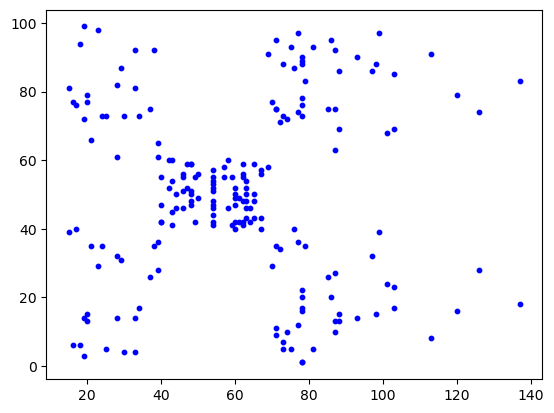

In [44]:
# Almacenando solamente los valores de Ingreso Anual y Puntuación de Gastos.
X = df.iloc[:, [3,4]].values
#Aquí, calculamos una gráfica que nos permita tener una visión general de nuestro conjunto de datos. 
plt.scatter(X [:,0], X [:,1], s=10, c= "blue")

Como se mencionó anteriormente, para ejecutar este algoritmo necesitamos algunos parámetros definidos: **Eps y minPoints**. Aunque no existe una forma automática de determinar los valores de **minPoints**, podemos realizar algunas funciones que nos permitirán tener nuestros **Eps**. Esto puede lograrse mediante el cálculo de la distancia-k entre todos los puntos en el conjunto de datos, el codo de la curva nos dará una aproximación del valor Eps. Seguir los siguientes pasos:

1. Calcule la distancia promedio entre cada punto en el conjunto de datos y sus **n** vecinos más cercanos (mi valor MinPts seleccionado).
2. Ordenar valores de distancia por valor ascendente y trazar

El valor ideal para ε será igual al valor de la distancia en el **codo**, o el punto de máxima curvatura. Este punto representa el punto de optimización en el que los rendimientos decrecientes ya no justifican el coste adicional.

In [45]:
#Calculamos la distancia k para determinar nuestro valor de eps.
def calculate_kn_distance (X, neigh=2):
    neigh=NearestNeighbors(n_neighbors=neigh)
    nbrs=neigh.fit(X)
    distances, indices=nbrs.kneighbors(X)
    return distances[:,1:].reshape(-1)
    
#Obtenemos el valor exacto de eps utilizando kneebow, esta función nos permite 
#encontrar el codo de una curva rotando la curva y tomando el valor mínimo.
def get_eps (X, neigh=2):
    eps_dist = np.sort(calculate_kn_distance(X, neigh=neigh))
    rotor=Rotor()
    curve_xy= np.concatenate ([np.arange(eps_dist.shape[0]).reshape(-1, 1), eps_dist.reshape(-1, 1)],1) 
    rotor.fit_rotate(curve_xy)
    rotor.plot_elbow()
    e_idx= rotor.get_elbow_index()
    return curve_xy[e_idx]

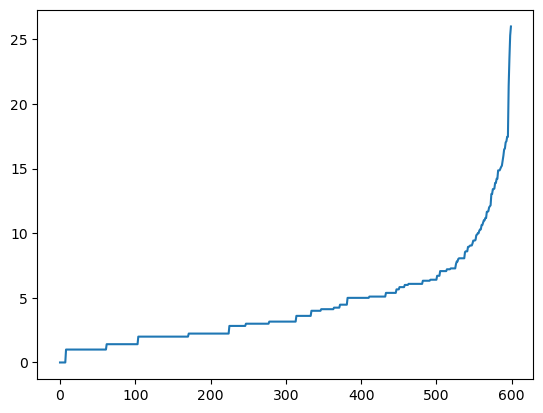

In [46]:
distances= calculate_kn_distance(X, neigh=4)
eps_dist = np.sort(distances)
plt.plot(eps_dist)

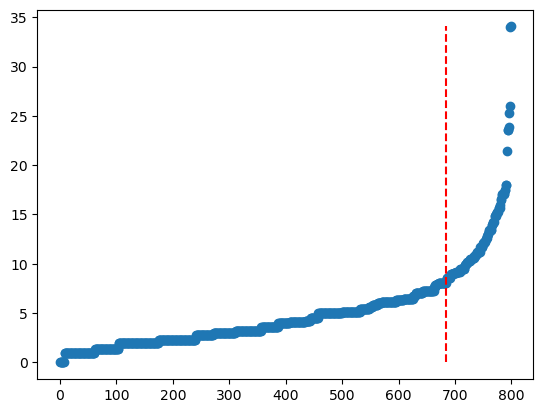

8.06225774829855


In [48]:
#Llamando a nuestra función principal
idx, eps=get_eps(X,neigh=5)
#Mostrando la versión rotada utilizada para encontrar el codo.
plt.show()
#Imprimiendo los valores exactos de nuestro eps, desde aquí los redondearemos #y los usaremos para nuestro método DBSCAN.
print(eps)

In [51]:
#Calculamos el DBSCAN dando como parámetros nuestro 
#valor de eps calculado y un número estimado de minPoints. 
clusters = DBSCAN (eps=8, min_samples=5).fit(X)
#Etiquetamos cada punto de datos en un clúster,
#desde 1 (ruido) hasta 4 (nuestro último clúster visitado). 
labels=clusters.labels_

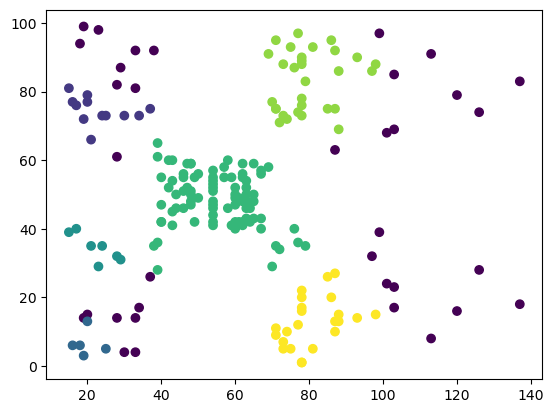

In [52]:
plt.scatter(X[:,0], X[:,1],c=labels)

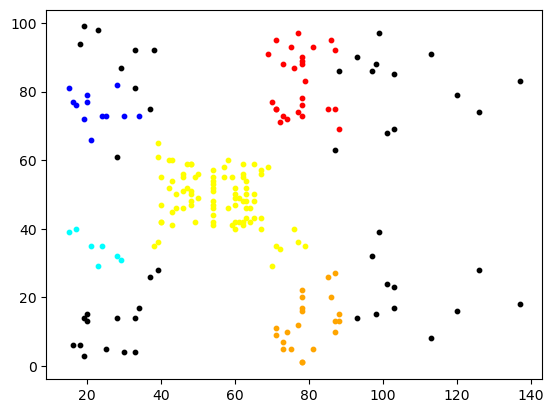

In [30]:
#Creamos nuestra gráfica agregando diferentes colores para cada etiqueta.
plt.scatter(X[labels == -1, 0], X[labels == -1, 1], s = 10, c = 'black') 
plt.scatter(X[labels == 0, 0], X[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(X[labels == 1, 0], X[labels == 1, 1], s = 10, c = 'cyan')
plt.scatter(X[labels == 2, 0], X[labels == 2, 1], s = 10, c = 'yellow')
plt.scatter(X [labels == 3, 0], X[labels == 3, 1],s = 10, c = 'red')
plt.scatter(X[labels == 4,0], X[labels == 4, 1], s = 10, c = 'orange' )
plt.show()